# Model for predicting whether a loan is approved or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import joblib
# import streamlit as st

I start off by loading the dataset from loan_data.csv, a synthetic dataset that is found in Kaggle.

# 1) Load Dataset

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv('loan_data.csv')

# Display the first 5 rows of the dataframe
print("Data loaded successfully! Here are the first 5 rows:")
df

Data loaded successfully! Here are the first 5 rows:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
df.head(20)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


# 2) Exploratory Data Analysis

I will be using three main ways to understand the data better:
1) df.info(): to get a summary of the dataset, including the data types and non-null(non-missing value) counts for each column. 
This can also get the data type of each column, which consists of mainly float64, object, int64, signifying numerical and categorical features.

2) df.duplicated().sum(): to check and provide the count of how many duplicate rows arein the dataset. This is important because duplicate rows can skew the analysis and the model.

3) df.describe(): to generate descriptive statistics for numerical columns. This will provide the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for each numerical column. This is useful to understand the distribution and central tendency of the data.

// From df.describe(): I found some values that are much rather unlikely to be true. For example, the person's age is over 100, and the employment experience is over 65 years. This is highly improbable for a loan applicant. So, I will remove these rows from the dataset.

In [4]:
# Display a summary of the DataFrame, including data types and non-null counts
print("---------- Data Info ----------")
df.info()

# Check for any duplicate rows
print(f"\n---------- Duplicate Rows ----------\nNumber of duplicate rows: {df.duplicated().sum()}")

# Generate descriptive statistics for numerical columns
print("\n---------- Descriptive Statistics ----------")
df.describe()

---------- Data Info ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


# 2.1) Data Cleaning:
Since in df.describe(), we found improbable values, I decided to remove rows where the age is over 100, and employment experience is over 65 years, in order to make this dataset more representable of real-world data.

In [5]:
# Based on the .describe() output, we found improbable values for age and employment experience.

# Remove rows where the age is over 100
df = df[df['person_age'] <= 100]

# Remove rows where employment experience is over 65 years
df = df[df['person_emp_exp'] <= 65]

# Verify the outliers have been removed by checking the summary again.
print("--- Descriptive Statistics After Removing Outliers ---")
df.describe()

--- Descriptive Statistics After Removing Outliers ---


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44992.000000,4.499200e+04,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000
mean,27.746955,7.990956e+04,5.392959,9583.245288,11.006448,0.139735,5.866087,632.582592,0.222262
std,5.901543,6.332239e+04,5.917871,6314.856103,2.979019,0.087207,3.875930,50.398623,0.415771
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577900e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,84.000000,2.448661e+06,62.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


Listing down the categorical columns to help me understand the unique values in each of them.

In [6]:
# List of categorical columns to inspect
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

# Loop through the columns and print their unique values
for col in categorical_cols:
    print(f"---------- Unique Values in '{col}' ----------")
    print(df[col].unique())
    print("\n")

---------- Unique Values in 'person_gender' ----------
['female' 'male']


---------- Unique Values in 'person_education' ----------
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


---------- Unique Values in 'person_home_ownership' ----------
['RENT' 'OWN' 'MORTGAGE' 'OTHER']


---------- Unique Values in 'loan_intent' ----------
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


---------- Unique Values in 'previous_loan_defaults_on_file' ----------
['No' 'Yes']




For safety, I will check for any logical inconsistencies in the dataset. 
For example: 

Employment experience cannot be greater than age.

Credit history length cannot be greater than age.

Loan percentage of income should be consistent with the calculated value and not be too off from the actual value.

In [7]:
# --- Check 1: Employment Experience vs. Age ---
print("[CHECK 1] Employment experience greater than age?")
improbable_employment = df[df['person_emp_exp'] > df['person_age']]
if len(improbable_employment) > 0:
    print(f"Result: Found {len(improbable_employment)} improbable rows.")
    print(improbable_employment[['person_age', 'person_emp_exp']])
else:
    print("Result: No rows found where employment experience > age.")

# --- Check 2: Credit History Length vs. Age ---
print("\n[CHECK 2] Credit history longer than age?")
improbable_credit_history = df[df['cb_person_cred_hist_length'] > (df['person_age'])]
if len(improbable_credit_history) > 0:
    print(f"Result: Found {len(improbable_credit_history)} improbable rows.")
    print(improbable_credit_history[['person_age', 'cb_person_cred_hist_length']])
else:
    print("Result: No improbable credit history lengths found.")

# --- Check 3: Loan Percentage of Income Consistency ---
print("\n[CHECK 3] Discrepancy in loan_percent_income calculation?")
# Calculate the percentage ourselves and find the difference
calculated_percent = df['loan_amnt'] / df['person_income']
difference = abs(df['loan_percent_income'] - calculated_percent)

# Find rows where the difference is significant (e.g., more than 1% or 0.01)
significant_diffs = df[difference > 0.01]
if len(significant_diffs) > 0:
    print(f"Result: FOUND {len(significant_diffs)} rows with significant discrepancies.")
    # Create a temporary column to show the calculated value for comparison
    temp_df = significant_diffs.copy()
    temp_df['calculated_percent'] = temp_df['loan_amnt'] / temp_df['person_income']
    print(temp_df[['person_income', 'loan_amnt', 'loan_percent_income', 'calculated_percent']])
else:
    print("Result: Loan to Income percentage is consistent.")

[CHECK 1] Employment experience greater than age?
Result: No rows found where employment experience > age.

[CHECK 2] Credit history longer than age?
Result: No improbable credit history lengths found.

[CHECK 3] Discrepancy in loan_percent_income calculation?
Result: Loan to Income percentage is consistent.


# 2.2) Univariate Analysis - Exploring individual features

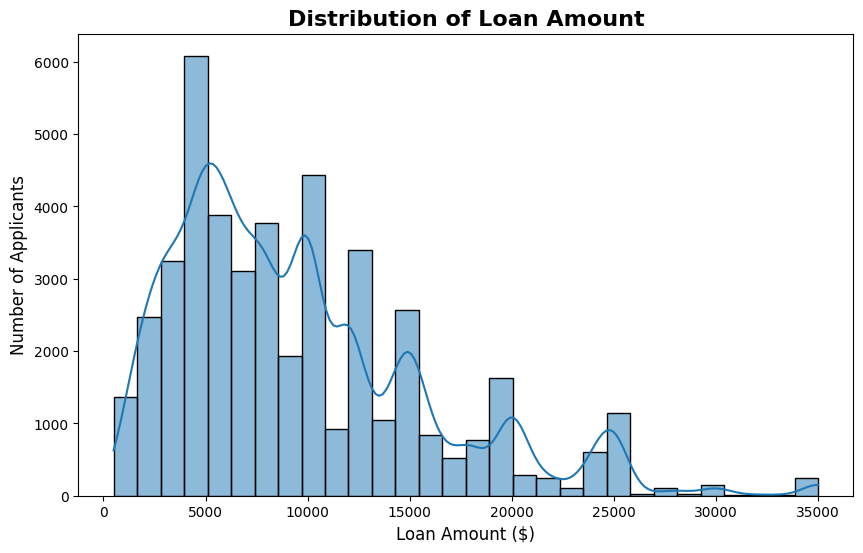

In [8]:
# Histogram for Loan Amount
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan_amnt', bins=30, kde=True) # kde for a distribution curve

# Add clear labels and a title
plt.title('Distribution of Loan Amount', size=16, fontweight='bold')
plt.xlabel('Loan Amount ($)', size=12)
plt.ylabel('Number of Applicants', size=12)
plt.show()

The Histogram for Loan Amount suggests the distribution is right-skewed, indicating that there are a few loans with significantly higher amounts compared to the majority of loans. This is a common characteristic in loan datasets, where a few outliers can significantly impact the overall distribution.

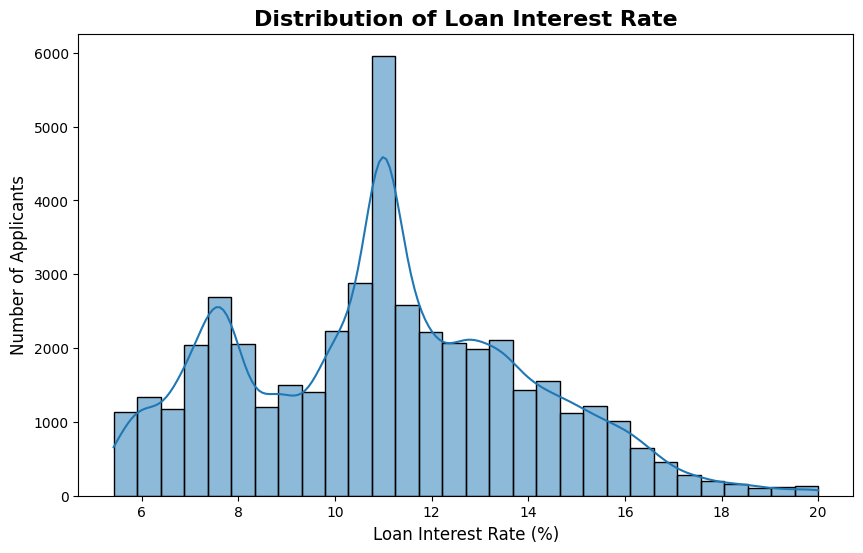

In [9]:
# Histogram for Loan Interest Rate.
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loan_int_rate', bins=30, kde=True)

# Add clear labels and a title.
plt.title('Distribution of Loan Interest Rate', size=16, fontweight='bold')
plt.xlabel('Loan Interest Rate (%)', size=12)
plt.ylabel('Number of Applicants', size=12)
plt.show()

The Histogram for Loan Interest Rate shows a slightly right-skewed distribution, indicating that there are a few loans with higher interest rates compared to the majority of loans

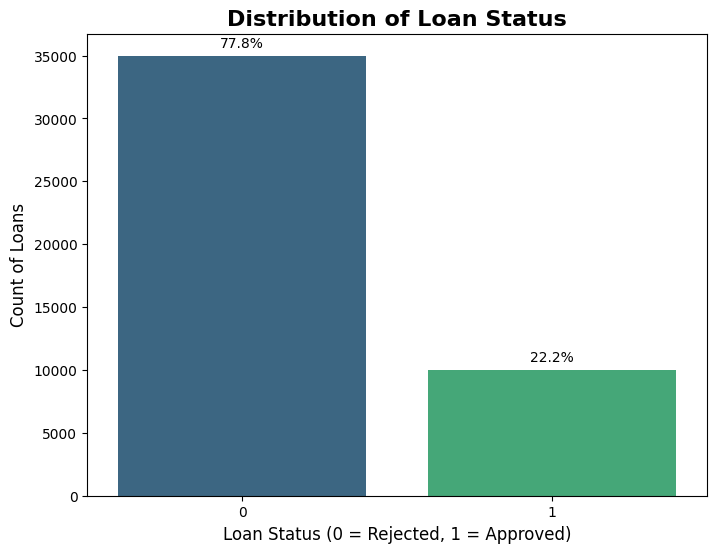

--- Target Variable Distribution ---
loan_status
0    0.777738
1    0.222262
Name: proportion, dtype: float64


In [10]:
# Create a count plot for the Loan Status
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='loan_status', data=df, palette='viridis', hue='loan_status', legend=False)

# Add clear labels and a title
plt.title('Distribution of Loan Status', size=16, fontweight='bold')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)', size=12)
plt.ylabel('Count of Loans', size=12)

# Add data labels (percentages) on top of each bar for clarity
total = len(df['loan_status'])
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

# Print the exact percentage for the report
print("--- Target Variable Distribution ---")
print(df['loan_status'].value_counts(normalize=True))

This graph shows the distribution of the loan_status, with 0 being rejected, and 1 being approved. I can conclude from this that there is a imbalance in this dataset, being more favoured to rejected loan statuses

# 2.3) Bivariate Analysis - Exploring features vs loan_status

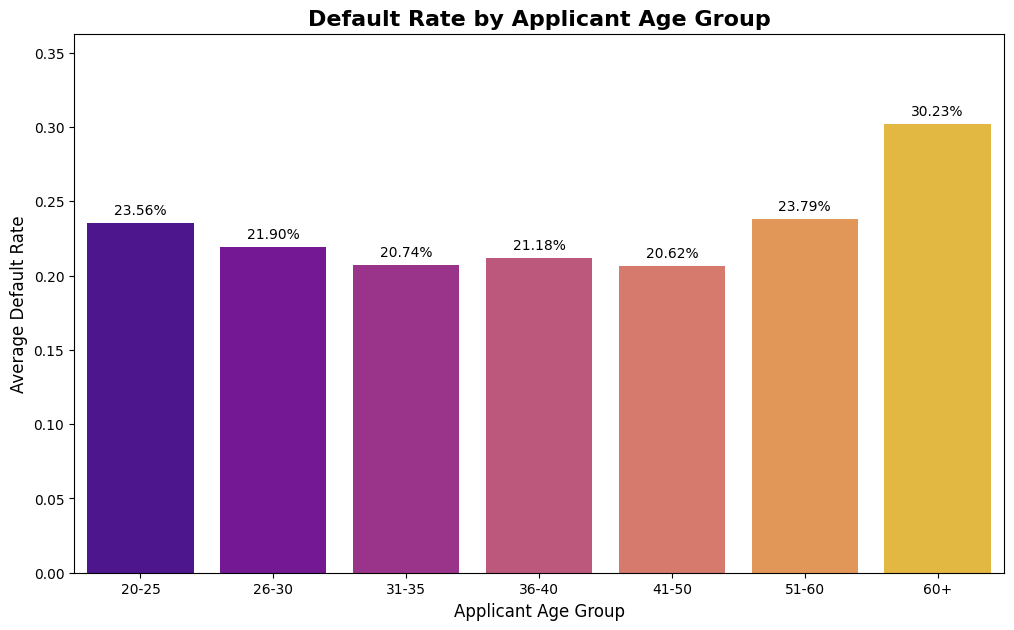

In [11]:
# Create age bins to group applicants.
bins = [20, 25, 30, 35, 40, 50, 60, 101] # Adjusted max age to 101 to include all valid data
labels = ['20-25', '26-30', '31-35', '36-40', '41-50', '51-60', '60+']
df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=False)

# Calculate the mean default rate for each age group.
# Added observed=True to prevent a FutureWarning.
age_group_default_rate = df.groupby('age_group', observed=True)['loan_status'].mean().reset_index()

# Plot the default rate by age group.
plt.figure(figsize=(12, 7))
# Added hue='age_group' to prevent a FutureWarning.
ax = sns.barplot(x='age_group', y='loan_status', data=age_group_default_rate, palette='plasma', hue='age_group')

# Add clear labels and a title.
plt.title('Default Rate by Applicant Age Group', size=16, fontweight='bold')
plt.xlabel('Applicant Age Group', size=12)
plt.ylabel('Average Default Rate', size=12)
plt.legend([],[], frameon=False) # Hide the redundant legend

# Add data labels (percentages) on top of each bar for clarity.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.ylim(0, age_group_default_rate['loan_status'].max() * 1.2) # Adjust y-axis for labels
plt.show()

This bar chart reveals a key trend: the risk of loan default is not linear with age.

Higher Risk at Extremes: The youngest applicants (20-25) and the oldest applicants (51+) have the highest default rates.

Lower Risk in Middle Age: Applicants in the 31-50 age range have the lowest and most stable default rates.

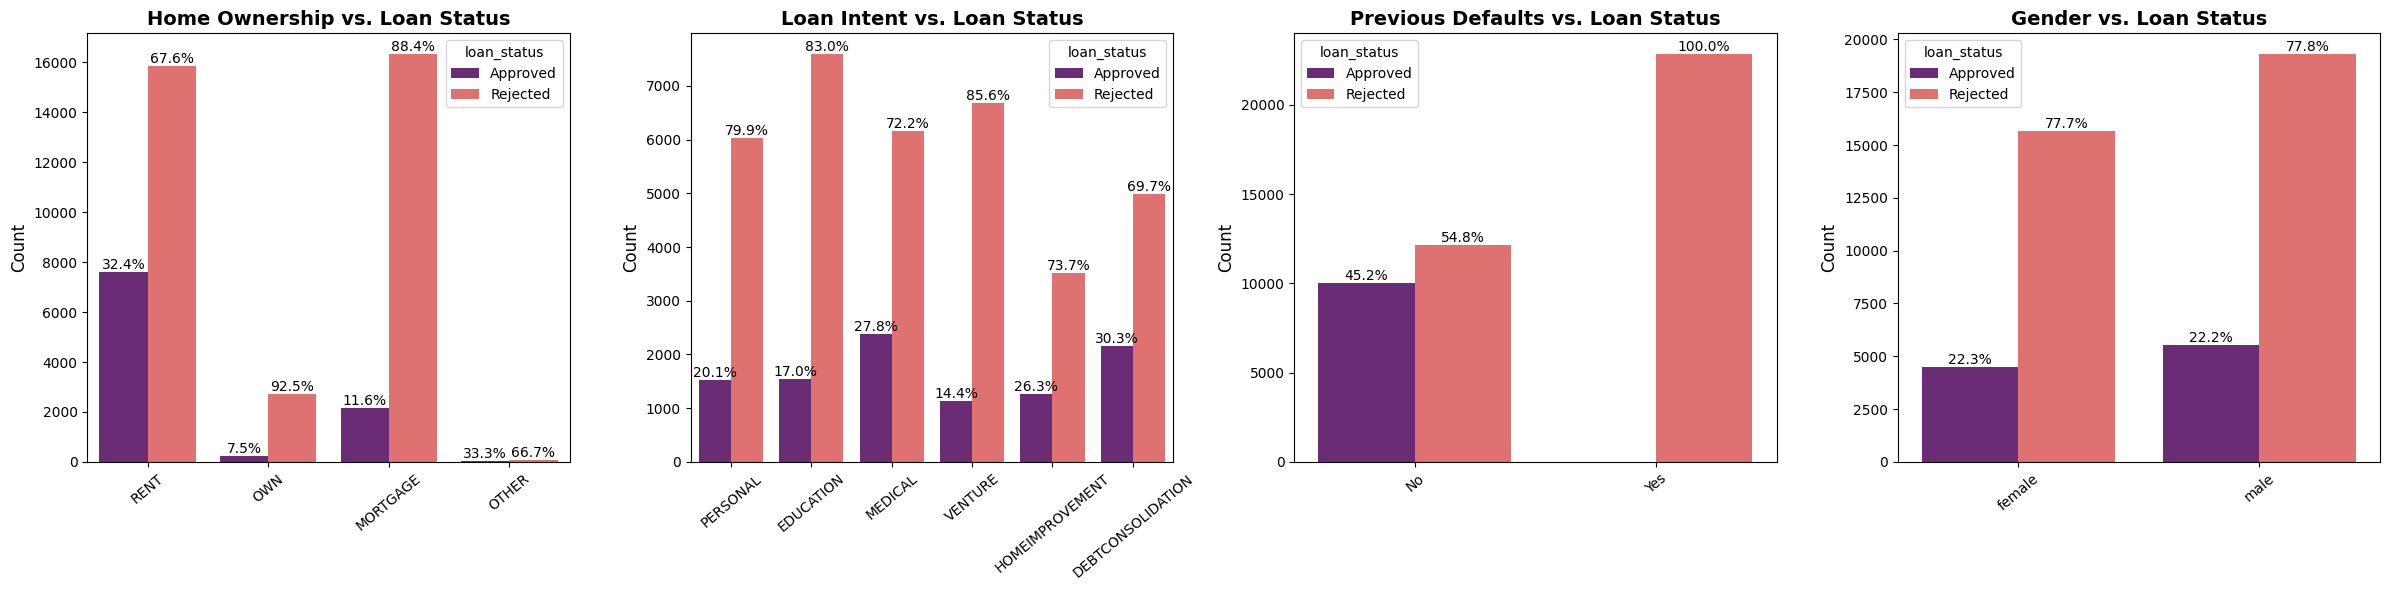

In [12]:
df_viz = df.copy()

# Map the numerical loan_status to descriptive labels for a clearer plot legend
df_viz['loan_status'] = df_viz['loan_status'].map({1: 'Approved', 0: 'Rejected'})

# Create a dictionary to hold pretty names for our plot titles
pretty_names = {
    'person_home_ownership': 'Home Ownership vs. Loan Status',
    'loan_intent': 'Loan Intent vs. Loan Status',
    'previous_loan_defaults_on_file': 'Previous Defaults vs. Loan Status',
    'person_gender': 'Gender vs. Loan Status'
}

# List of categorical features to analyze
categorical_features_to_plot = ['person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'person_gender']

# Create a figure with a 1x4 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Loop through each feature and create the plot on its respective axis
for i, feature in enumerate(categorical_features_to_plot):
    ax = axes[i]
    
    # Create the count plot with the hue for loan_status
    sns.countplot(x=feature, hue='loan_status', data=df_viz, ax=ax, palette='magma')
    
    # This method calculates the percentage for each bar based on the total count 
    # within its own x-axis category (e.g., total for 'RENT', total for 'OWN', etc.)
    
    # Calculate the totals for each category in the current feature
    totals = df_viz.groupby(feature).size()

    # Iterate through the bars (patches) on the current axis
    for p in ax.patches:
        height = p.get_height()
        
        # Only add a label if the bar has a height (is visible)
        if height > 0:
            # Get the x-tick label for the current bar's position
            # This gives us the category name (e.g., 'RENT')
            x_label_index = int(round(p.get_x() + p.get_width() / 2 - ax.get_xticks()[0]))
            x_label = ax.get_xticklabels()[x_label_index].get_text()

            # Get the total count for that specific category
            total_for_bin = totals[x_label]
            
            # Calculate and format the percentage
            percentage = f'{100 * height / total_for_bin:.1f}%'
            
            # Get the coordinates to place the text
            x = p.get_x() + p.get_width() / 2
            y = height
            
            # Add the text label to the plot
            ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    # Set the title and rotate x-axis labels for readability
    ax.set_title(pretty_names[feature], size=14, fontweight='bold')
    ax.set_xlabel(None) # Remove individual x-labels to avoid clutter
    ax.set_ylabel('Count', size=12)
    ax.tick_params(axis='x', rotation=40)
    

# Adjust the overall layout and display the plot
plt.tight_layout()
plt.show()


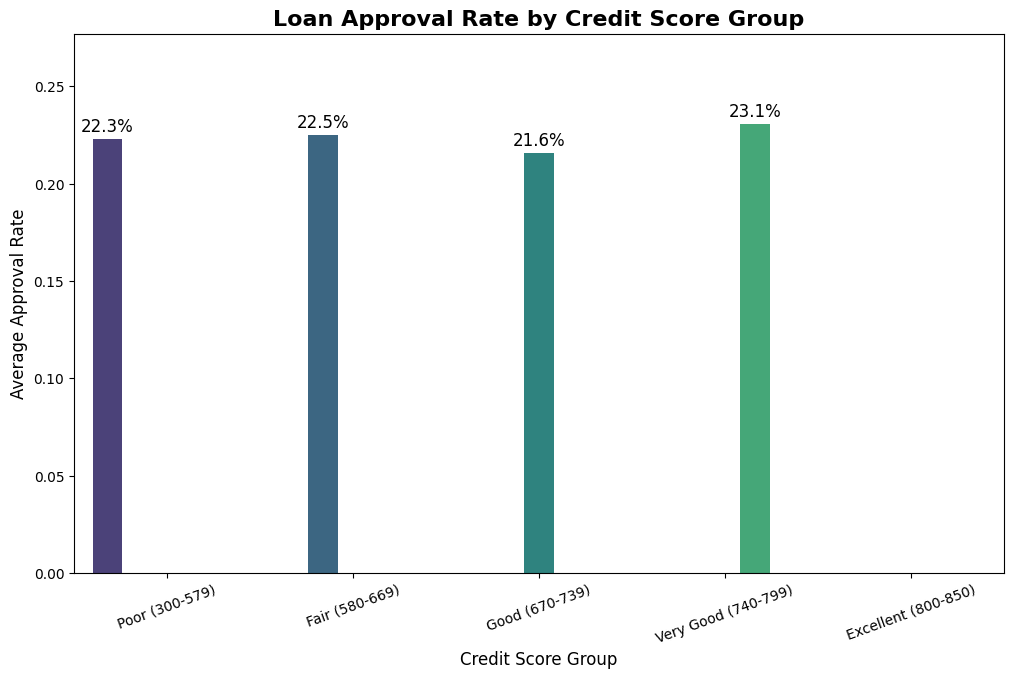

In [13]:
score_bins = [300, 580, 670, 740, 800, 851] # The last bin goes up to 851 to include 850
score_labels = ['Poor (300-579)', 'Fair (580-669)', 'Good (670-739)', 'Very Good (740-799)', 'Excellent (800-850)']

# Create a new column in the dataframe for the credit score groups.
# We use a copy to ensure the original dataframe 'df' remains unchanged.
df_viz_credit = df.copy()
df_viz_credit['credit_score_group'] = pd.cut(df_viz_credit['credit_score'], bins=score_bins, labels=score_labels, right=False)

# Calculate the mean approval rate for each credit score group.
# loan_status of 1 means approved, so the mean is the approval rate.
credit_group_approval_rate = df_viz_credit.groupby('credit_score_group', observed=True)['loan_status'].mean().reset_index()

# --- Plot the Approval Rate by Credit Score Group ---
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x='credit_score_group',
    y='loan_status',
    data=credit_group_approval_rate,
    palette='viridis',
    hue='credit_score_group', # Use hue to prevent future warnings and allow for palette
    legend=False
)

# Add clear labels and a title.
plt.title('Loan Approval Rate by Credit Score Group', size=16, fontweight='bold')
plt.xlabel('Credit Score Group', size=12)
plt.ylabel('Average Approval Rate', size=12)
plt.xticks(rotation=20) # Rotate labels slightly for better readability

# Add data labels (percentages) on top of each bar.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=12)

# Adjust y-axis to make space for the labels.
plt.ylim(0, credit_group_approval_rate['loan_status'].max() * 1.2)
plt.show()


# --- Multivariate Analysis ---

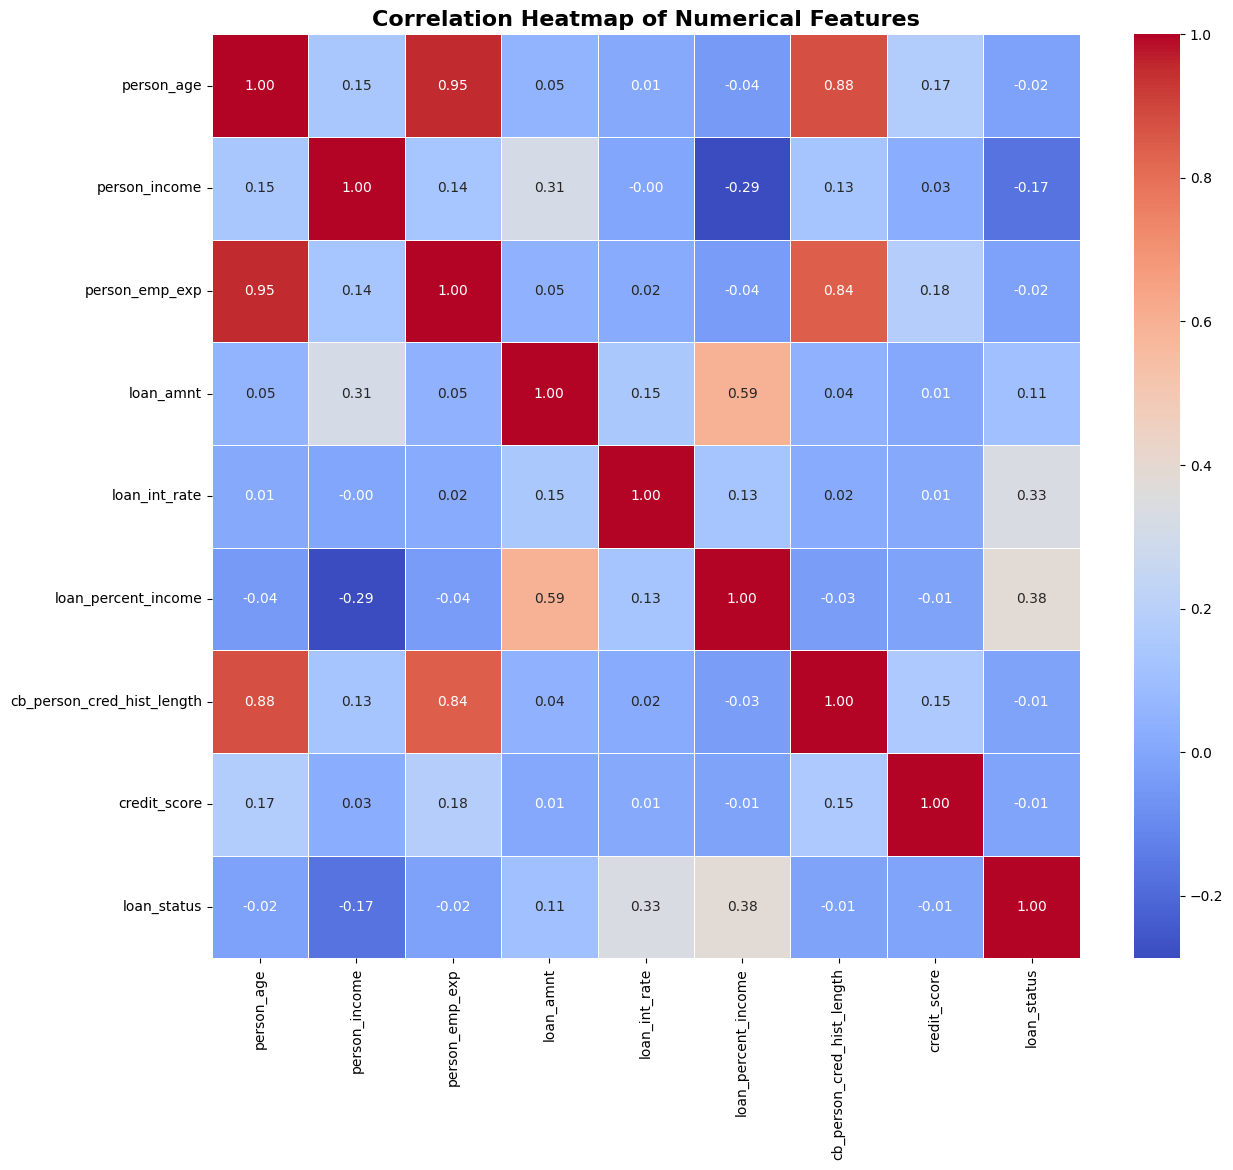

In [14]:
# Calculate the correlation matrix.
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure.
plt.figure(figsize=(14, 12))

# Draw the heatmap.
sns.heatmap(corr_matrix,
            annot=True,      # correlation values
            cmap='coolwarm', # color scheme
            fmt='.2f',       # two decimal places
            linewidths=.5)

plt.title('Correlation Heatmap of Numerical Features', size=16, fontweight='bold')
plt.show()

# 3) Pre-processing

In [15]:
# --- Feature Selection ---
# Based on the EDA, the 'person_gender' feature has very low predictive importance.
# The 'age_group' column was created for visualization only and is redundant.
# We will drop them to simplify the model.
df = df.drop(columns=['person_gender', 'age_group'])

print("Dropped 'person_gender' and 'age_group' columns.")

Dropped 'person_gender' and 'age_group' columns.


In [16]:
# Identify the remaining categorical columns for encoding.
categorical_cols = ['person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

# Apply One-Hot Encoding using pandas get_dummies().
# We use drop_first=True to avoid multicollinearity.
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [18]:
df_processed 

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_education_Bachelor,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,True,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,False,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1,False,...,False,False,False,True,False,False,True,False,False,False
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1,False,...,False,False,False,True,False,True,False,False,False,False
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1,False,...,False,False,False,True,False,False,False,False,False,False
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1,True,...,False,False,False,True,True,False,False,False,False,False


# 4) Train-test split

In [19]:
# We keep X as a DataFrame to retain column names for later analysis.
X = df_processed.drop('loan_status', axis=1)
y = df_processed['loan_status']

# We use an 80% train / 20% test split.
# stratify=y is crucial here to ensure the class distribution is the same in both the train and test sets, which is important for our imbalanced dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5) Model Evaluation

--- Training and Evaluating Baseline Models ---

--- Evaluating: Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6999
           1       0.78      0.75      0.76      2000

    accuracy                           0.90      8999
   macro avg       0.85      0.84      0.85      8999
weighted avg       0.90      0.90      0.90      8999



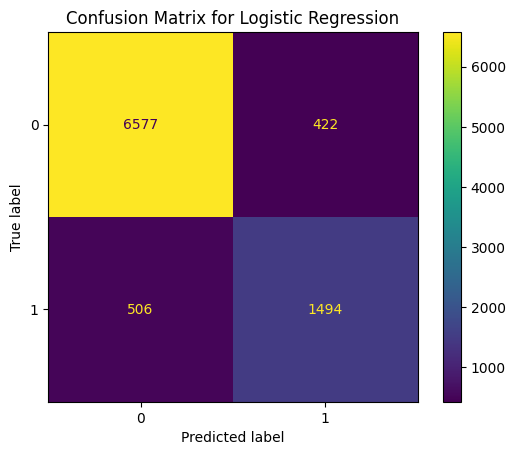


--- Evaluating: Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6999
           1       0.90      0.77      0.83      2000

    accuracy                           0.93      8999
   macro avg       0.92      0.87      0.89      8999
weighted avg       0.93      0.93      0.93      8999



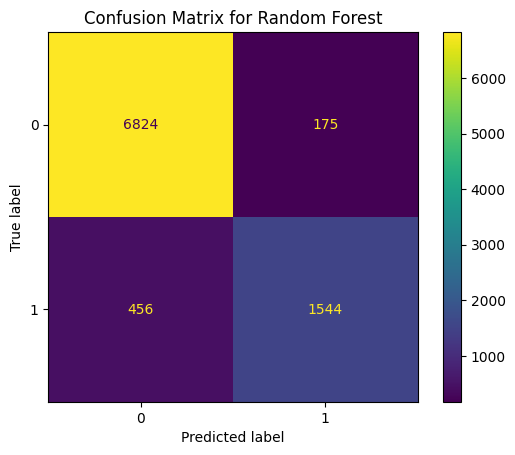


--- Evaluating: Gradient Boosting ---
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6999
           1       0.88      0.76      0.82      2000

    accuracy                           0.92      8999
   macro avg       0.91      0.87      0.89      8999
weighted avg       0.92      0.92      0.92      8999



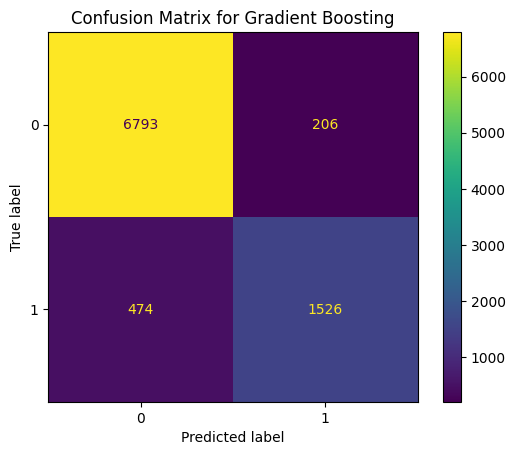



--- Summary of Model Performance (Sorted by Recall) ---
                 Model  Recall  Accuracy  Precision  F1-Score
1        Random Forest   0.772  0.929881   0.898197  0.830331
2    Gradient Boosting   0.763  0.924436   0.881062  0.817792
0  Logistic Regression   0.747  0.896877   0.779749  0.763023


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, f1_score, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler

# --- A-Grade Improvement: Scale the Data ---
# Scaling the data is crucial for models like Logistic Regression to converge properly and perform well.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the models to be compared.
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Store the results for a final comparison table.
results_list = []

print("--- Training and Evaluating Baseline Models ---")

# Loop through each model to train, predict, and evaluate.
for name, model in models.items():
    print(f"\n--- Evaluating: {name} ---")

    # Train the model. Note: Logistic Regression now uses the scaled data.
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Tree-based models like Random Forest and Gradient Boosting do not require feature scaling.
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # --- Evaluation Metrics ---
    # The classification report provides a comprehensive overview.
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # The confusion matrix is an informative visualization.
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
    
    # Store the key metrics for our summary table.
    results_list.append({
        'Model': name, 
        'Recall': recall_score(y_test, y_pred, pos_label=1), 
        'Accuracy': accuracy_score(y_test, y_pred), 
        'Precision': precision_score(y_test, y_pred, pos_label=1), 
        'F1-Score': f1_score(y_test, y_pred, pos_label=1)
    })

# --- Final Comparison ---
# Create a DataFrame from the results for easy comparison.
results_df = pd.DataFrame(results_list)

print("\n\n--- Summary of Model Performance (Sorted by Recall) ---")
print(results_df.sort_values(by='Recall', ascending=False))

# --- 6. Model Explainability ---

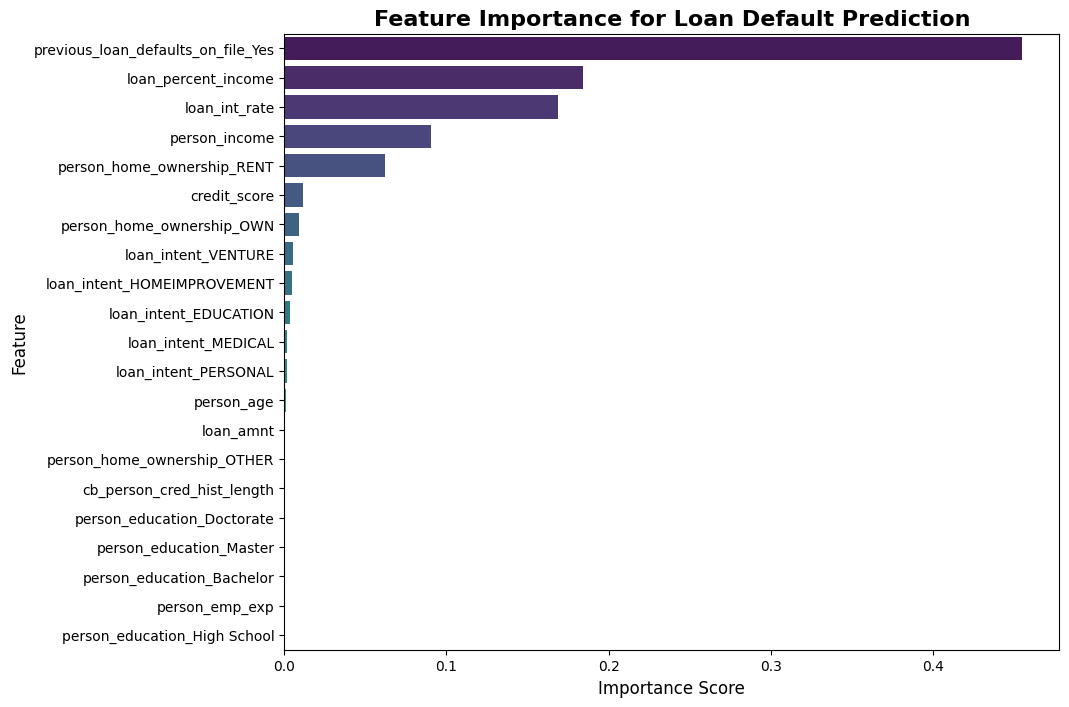

In [21]:
# Get the feature importances from the trained Gradient Boosting model, which is stored in our 'models' dictionary.
importances = models["Gradient Boosting"].feature_importances_

# Get the names of the features from our training data.
feature_names = X_train.columns

# Create a pandas DataFrame for easier plotting.
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the DataFrame by importance in descending order.
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# --- Plot the Feature Importances ---
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis', hue = 'feature', legend=False)

plt.title('Feature Importance for Loan Default Prediction', size=16, fontweight='bold')
plt.xlabel('Importance Score', size=12)
plt.ylabel('Feature', size=12)
plt.show()

# --- 7. Hyperparameter Tuning ---

In [22]:
models["Gradient Boosting"].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [23]:
from sklearn.model_selection import RandomizedSearchCV

# We will now perform hyperparameter tuning to find its optimal settings.

# Define a wide grid of hyperparameters to search.
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# We must provide an unfitted model to RandomizedSearchCV.
# This is the "blueprint" of our champion model that the search will use.
gb_for_tuning = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV.
# We are optimizing for 'recall' as it is our most important business metric.
random_search = RandomizedSearchCV(
    estimator=gb_for_tuning,
    param_distributions=param_grid,
    n_iter=200, # Number of parameter settings that are sampled.
    cv=5,      # 5-fold cross-validation.
    verbose=2,
    random_state=42,
    n_jobs=-1, # Use all available CPU cores.
    scoring='recall'
)

# Fit the random search to the training data.
print("Running Randomized Search CV to find the best hyperparameters for Recall...")
random_search.fit(X_train, y_train)

# Print the best parameters found.
print("\n--- Best Parameters found by Randomized Search ---")
print(random_search.best_params_)

# Print the best score achieved during the search, as you requested.
print(f"\nBest cross-validation recall score: {random_search.best_score_:.4f}")

Running Randomized Search CV to find the best hyperparameters for Recall...
Fitting 5 folds for each of 200 candidates, totalling 1000 fits

--- Best Parameters found by Randomized Search ---
{'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.2}

Best cross-validation recall score: 0.8126


Running Randomized Search CV to find the best hyperparameters for Recall...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

--- Best Parameters found by Randomized Search ---
{'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.2}

Best cross-validation recall score: 0.8126

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# --- Hyperparameter Tuning for Random Forest ---
# Based on the baseline evaluation, Random Forest showed the strongest initial performance.
# We will now use RandomizedSearchCV to find the optimal hyperparameters for it,
# focusing on maximizing the 'recall' score.

# 1. Define a wide grid of hyperparameters to search.
# This grid covers the most influential parameters for a RandomForestClassifier.
param_grid_rf = {
    # Number of trees in the forest. More trees can improve performance but increase computation time.
    'n_estimators': [100, 200, 300, 500],
    
    # The function to measure the quality of a split.
    'criterion': ['gini', 'entropy'],
    
    # The maximum depth of the tree. If None, nodes are expanded until all leaves are pure.
    'max_depth': [10, 20, 30, None],
    
    # The minimum number of samples required to split an internal node.
    'min_samples_split': [2, 5, 10],
    
    # The minimum number of samples required to be at a leaf node.
    'min_samples_leaf': [1, 2, 4],
    
    # The number of features to consider when looking for the best split.
    # 'sqrt' is sqrt(n_features), 'log2' is log2(n_features).
    'max_features': ['sqrt', 'log2', None],
    
    # Whether bootstrap samples are used when building trees.
    'bootstrap': [True, False]
}

# 2. Initialize the base model for tuning.
# We provide an unfitted model as the estimator for the search.
rf_for_tuning = RandomForestClassifier(random_state=42)

# 3. Initialize RandomizedSearchCV.
# This will sample a fixed number of parameter settings (n_iter) from the grid.
# It's more efficient than searching every single combination (GridSearchCV).
random_search_rf = RandomizedSearchCV(
    estimator=rf_for_tuning,
    param_distributions=param_grid_rf,
    n_iter=100,          # Number of parameter settings that are sampled. 100 is a good starting point.
    cv=5,                # 5-fold cross-validation.
    verbose=2,           # Prints progress updates.
    random_state=42,
    n_jobs=-1,           # Use all available CPU cores to speed up the process.
    scoring='recall'     # The metric to optimize for. We focus on recall for the positive class (1).
)

# 4. Fit the random search to the training data.
# This will start the process of training and evaluating 100 different models.
# Note: This step can take some time to complete.
# We assume X_train and y_train are already defined from your train-test split.
print("Running Randomized Search CV to find the best hyperparameters for Random Forest...")
random_search_rf.fit(X_train, y_train)

# 5. Print the best parameters and the best score.
print("\n--- Best Parameters found by Randomized Search for Random Forest ---")
print(random_search_rf.best_params_)
print(f"\nBest cross-validation recall score: {random_search_rf.best_score_:.4f}")

# You can now proceed to evaluate this `random_search_rf.best_estimator_` on your test set
# just like you did for the final Gradient Boosting model.


Running Randomized Search CV to find the best hyperparameters for Random Forest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

--- Best Parameters found by Randomized Search for Random Forest ---
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}

Best cross-validation recall score: 0.7867


---------- Final Model Performance (Tuned for Recall) ----------

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6999
           1       0.88      0.82      0.85      2000

    accuracy                           0.94      8999
   macro avg       0.91      0.89      0.90      8999
weighted avg       0.93      0.94      0.93      8999

Final Recall Score (for defaults): 0.8210

Confusion Matrix:


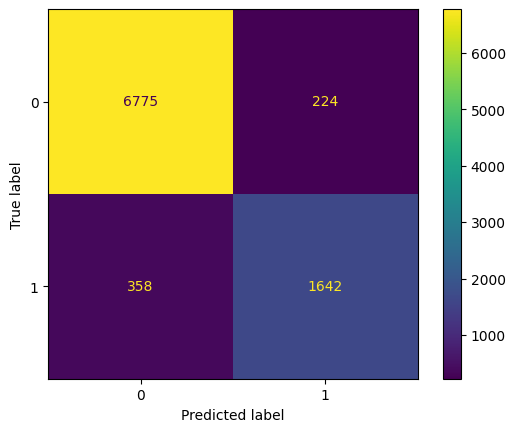

In [25]:
from sklearn.metrics import classification_report, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Get the best model that was optimized for recall
final_model = random_search.best_estimator_
# final_model_rf = random_search_rf.best_estimator_

# Make predictions on the test set
y_pred_final = final_model.predict(X_test)

# --- Final Model Evaluation ---
print("---------- Final Model Performance (Tuned for Recall) ----------\n")

# The classification report gives a full breakdown
print("Classification Report:")
print(classification_report(y_test, y_pred_final))

# Specifically highlight the final recall score
final_recall = recall_score(y_test, y_pred_final, pos_label=1)
print(f"Final Recall Score (for defaults): {final_recall:.4f}\n")

# The confusion matrix is crucial for understanding recall
print("Confusion Matrix:")
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_final, display_labels=final_model.classes_)
disp.plot()
plt.show()

In [40]:
# df_processed.columns
# # gb_model.predict([[22,71948,0,35000,0.49,3,561,0,0,0,1,0,0,1,0,0,0,1,0,0]])

In [26]:
# --- 8. Save Final Model ---

# Use joblib.dump to serialize and save the model to a file named 'gb_model.pkl'.
joblib.dump(final_model, 'gb_model.pkl')
# joblib.dump(final_model_rf, 'rf_model.pkl')

print("Gradient Boosting model has been successfully saved as 'gb_model.pkl'.")

Gradient Boosting model has been successfully saved as 'gb_model.pkl'.
